# HR Analytics Project- Understanding the Attrition in HR


Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

# Importing some required library

In [1]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading data set
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Basic Data Analysis

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# In this data set there are some categorical featurs and some are continuous features.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Checking null values 

In [8]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

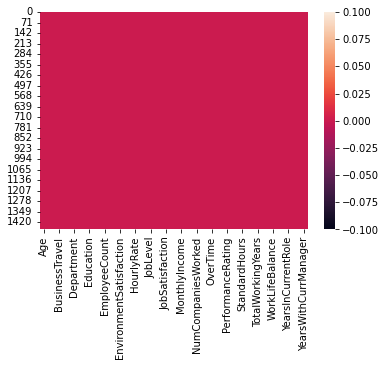

In [10]:
sns.heatmap(df.isnull())

In [11]:
#Observation : From above analysis, it can be say that there are no null values in dataset.

# Summary statastics

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [14]:
# There are 3 departments in which R&D and sales has more values

In [15]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [16]:
# People are distributed here three major travel categorries Travel Rarely, Travel Frequently and Non-Travlers

In [17]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [18]:
#Here, it can be seen that there 6 major education field where life science has maximum no. of employess

In [19]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [20]:
## There are 9 Job Roles and maximum people comes under Sales Execative follwed by Research analyst

# EDA process (Data Wranfling and Data cleaning)

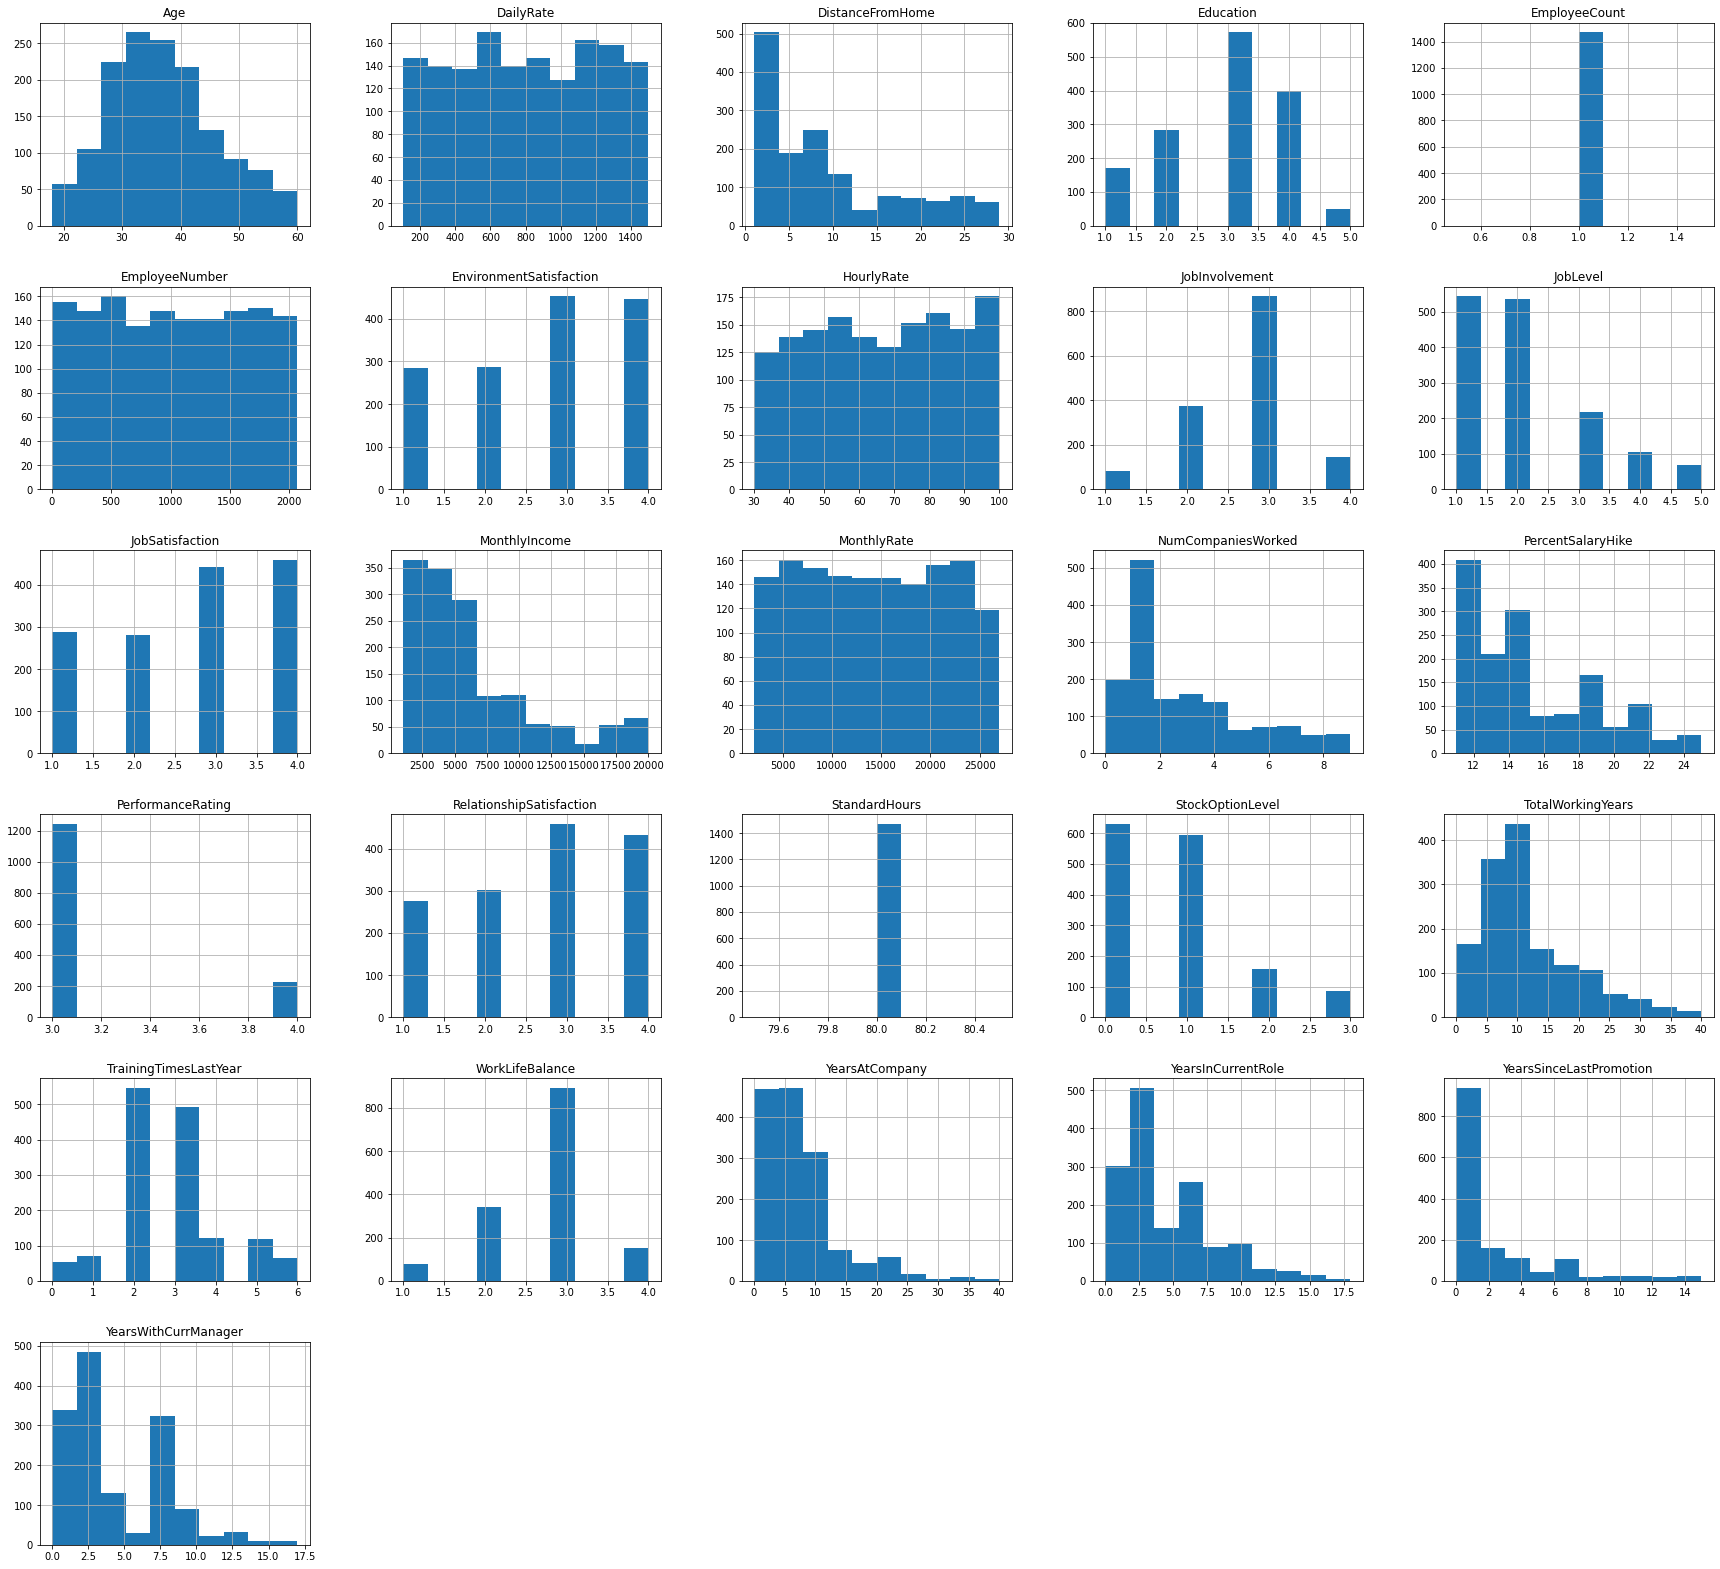

In [21]:
df.hist(figsize=(30,28));

# BAR Plot

(array([0, 1, 2]),
 [Text(0, 0, 'Travel_Rarely'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Non-Travel')])

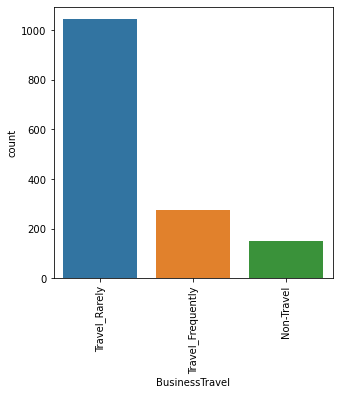

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(df.BusinessTravel)
plt.xticks(rotation=90)

Observation : Travel_Rarely by employess is maximum

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

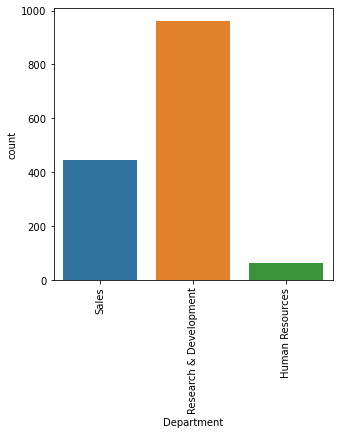

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(df.Department)
plt.xticks(rotation=90)

Observation : Maximum no. of Employees are working in R&D. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

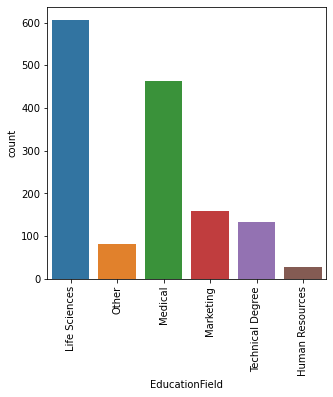

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(df.EducationField)
plt.xticks(rotation=90)

Observation :In Education Field We can see that employee come from Life Science has maximum count

In [25]:
dfcor=df.corr()   

In [26]:
dfcor

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


# Check Correlation

<AxesSubplot:>

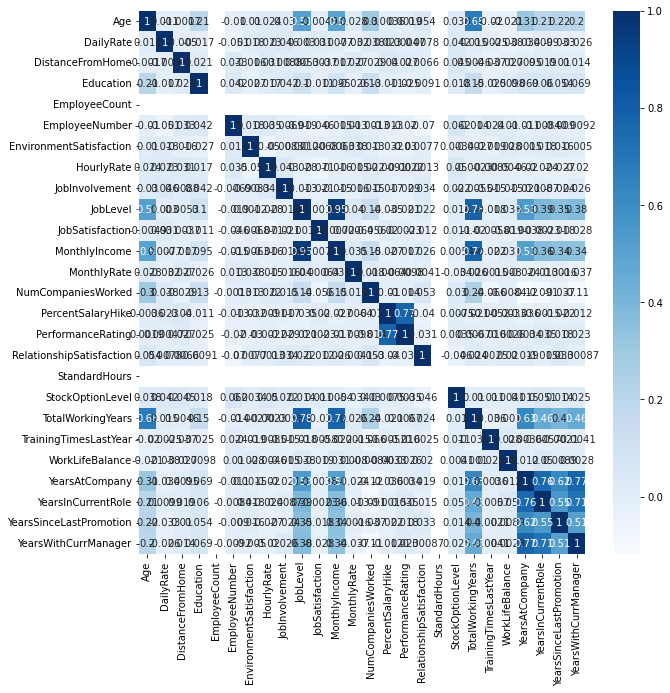

In [27]:
plt.figure(figsize=(10,10))           ### figsize=(10,10)   length,breadth
sns.heatmap(dfcor,cmap='Blues',annot=True)   ## cmap='Blues'  it will represent in blue color & annot=True means it will represent the correlated value in plot.

# Check the Distribution of all attributes

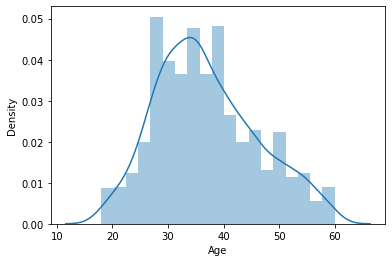

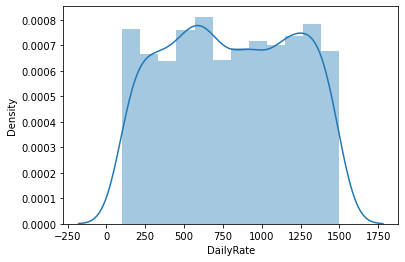

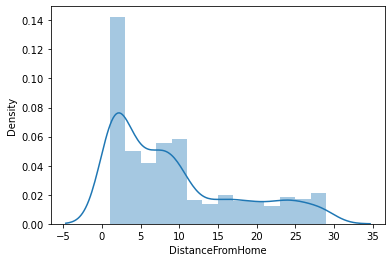

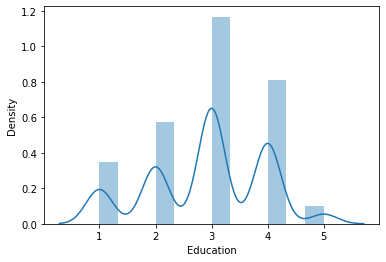

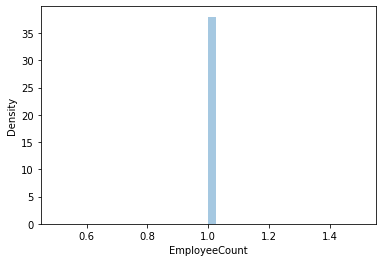

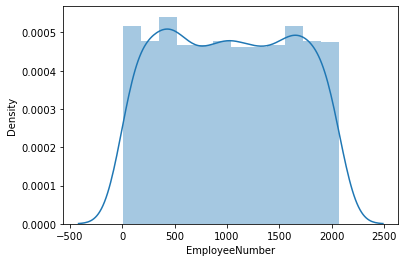

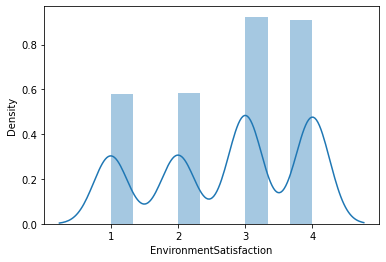

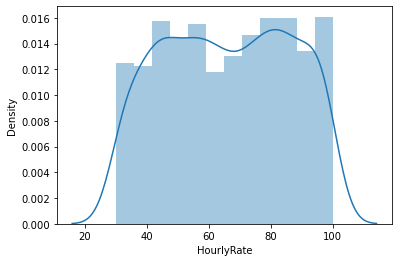

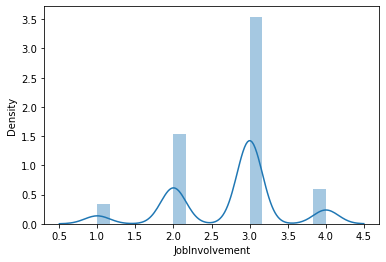

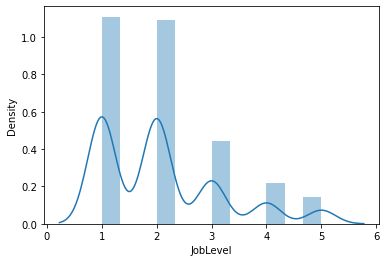

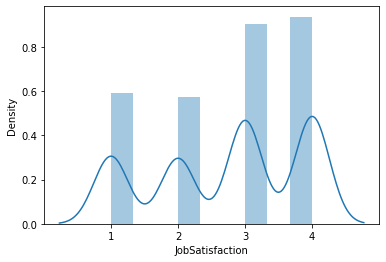

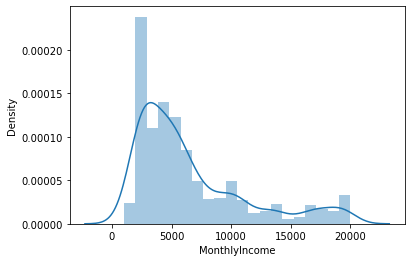

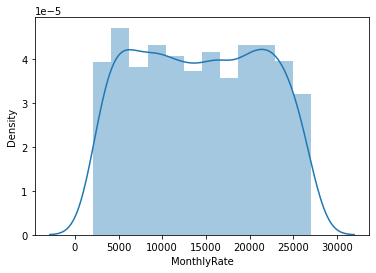

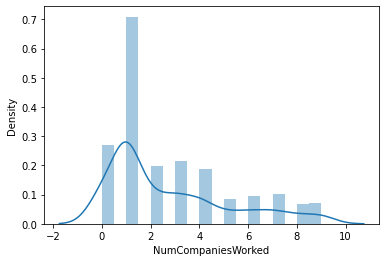

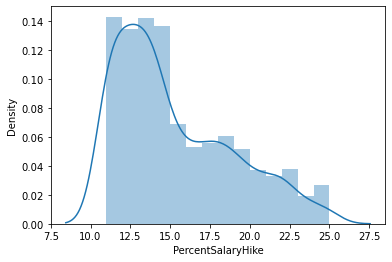

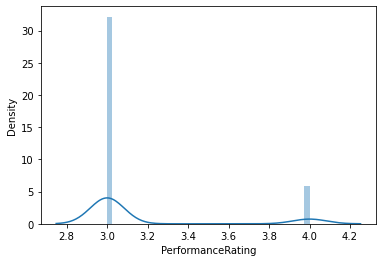

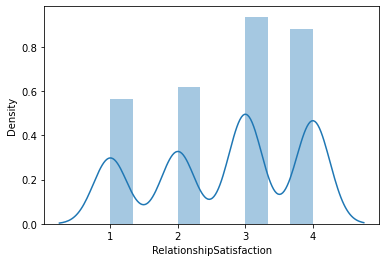

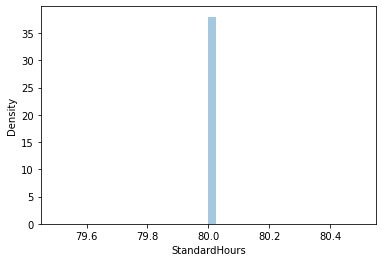

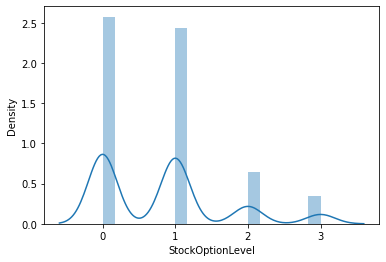

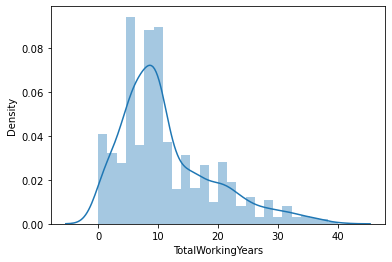

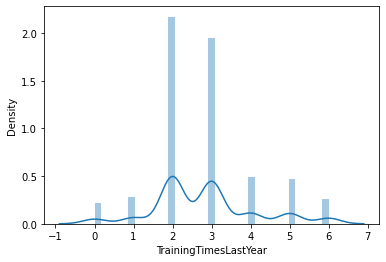

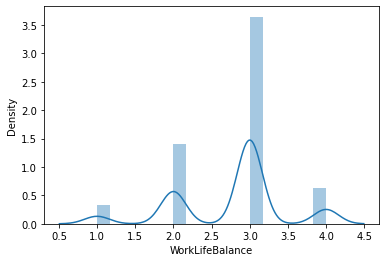

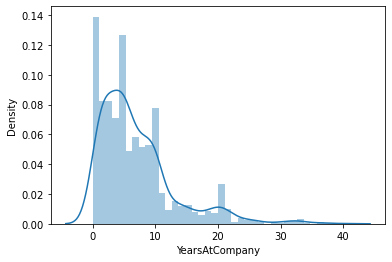

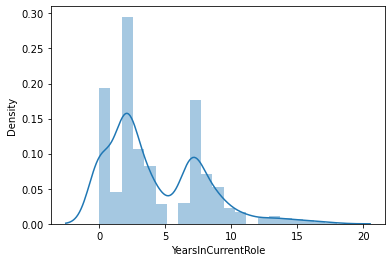

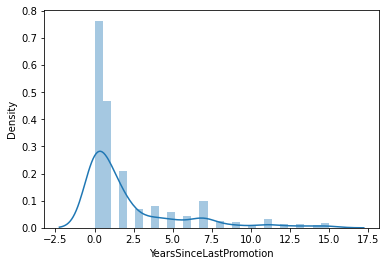

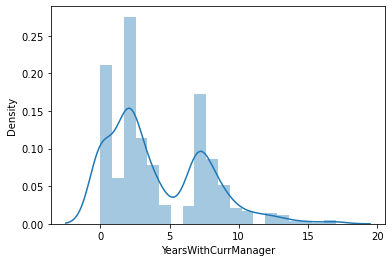

In [28]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

In [29]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Observation : Some attributes have little skewness so it can be removed out by SQRT method.

# Skewness removal

In [30]:

df['DistanceFromHome']=np.sqrt(df['DistanceFromHome'])
df['MonthlyIncome']=np.sqrt(df['MonthlyIncome'])
df['PercentSalaryHike']=np.sqrt(df['PercentSalaryHike'])
df['YearsAtCompany']=np.sqrt(df['YearsAtCompany'])
df['YearsSinceLastPromotion']=np.sqrt(df['YearsSinceLastPromotion'])
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.398114
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              0.426835
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.739126
YearsWithCurrManager        0.833451
dtype: float64

# Label Encoding 

In [31]:
 ## from object data type to int
from sklearn.preprocessing import LabelEncoder

In [32]:
label=LabelEncoder()
varib = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in varib:
    df[i]=label.fit_transform(df[i])


In [33]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1.000000,2,1,1,1,...,1,80,0,8,0,1,2.449490,4,0.000000,5
1,49,0,1,279,1,2.828427,1,1,1,2,...,4,80,1,10,3,3,3.162278,7,1.000000,7
2,37,1,2,1373,1,1.414214,2,4,1,4,...,2,80,0,7,3,3,0.000000,0,0.000000,0
3,33,0,1,1392,1,1.732051,4,1,1,5,...,3,80,0,8,3,3,2.828427,7,1.732051,0
4,27,0,2,591,1,1.414214,1,3,1,7,...,4,80,1,6,3,3,1.414214,2,1.414214,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,4.795832,2,3,1,2061,...,3,80,1,17,3,3,2.236068,2,0.000000,3
1466,39,0,2,613,1,2.449490,1,3,1,2062,...,1,80,1,9,5,3,2.645751,7,1.000000,7
1467,27,0,2,155,1,2.000000,3,1,1,2064,...,2,80,1,6,0,3,2.449490,2,0.000000,3
1468,49,0,1,1023,2,1.414214,3,3,1,2065,...,4,80,0,17,3,2,3.000000,6,0.000000,8


In [34]:
# Now all data in Numeric format

In [35]:

df.drop('EmployeeCount', axis=1,inplace=True)
df.drop('StandardHours', axis=1,inplace=True)
df.drop('Over18', axis=1,inplace=True)

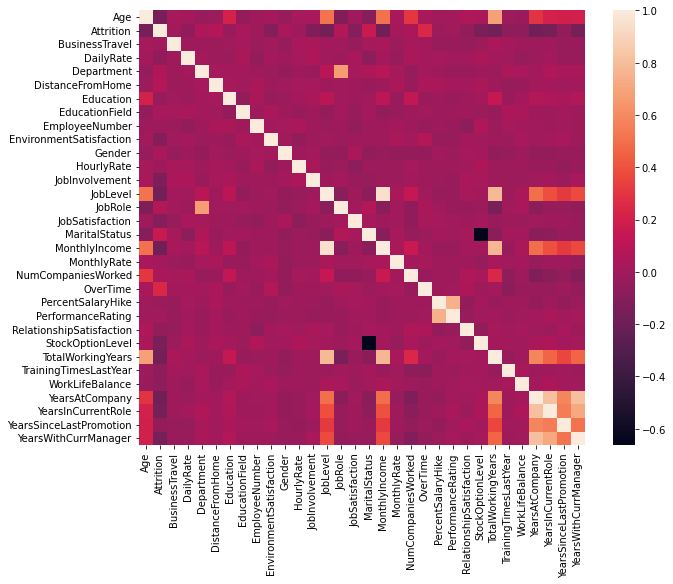

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmax=1)
plt.show()

Observation : I have dropped few attributes which was constant in given dataset for seeing better correlation in heatmap.

# Checking for outliers

<AxesSubplot:>

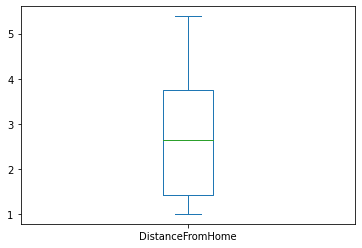

In [36]:
df['DistanceFromHome'].plot.box()

<AxesSubplot:>

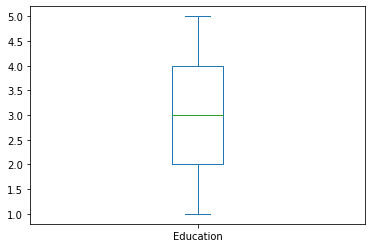

In [37]:
df['Education'].plot.box()

<AxesSubplot:>

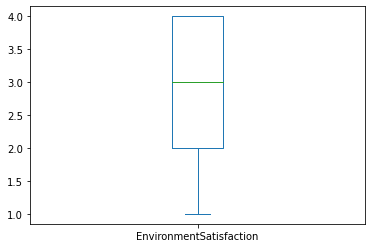

In [38]:
df['EnvironmentSatisfaction'].plot.box()

<AxesSubplot:>

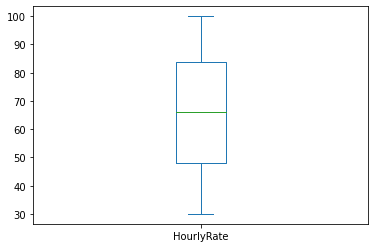

In [39]:
df['HourlyRate'].plot.box()

<AxesSubplot:>

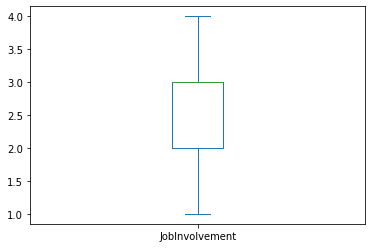

In [43]:
df['JobInvolvement'].plot.box()

<AxesSubplot:>

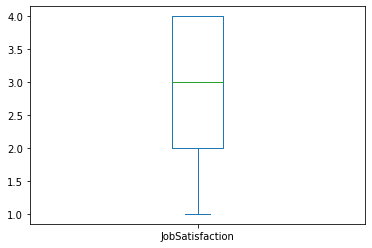

In [44]:
df['JobSatisfaction'].plot.box()

<AxesSubplot:>

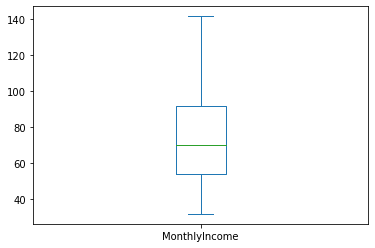

In [45]:
df['MonthlyIncome'].plot.box()

<AxesSubplot:>

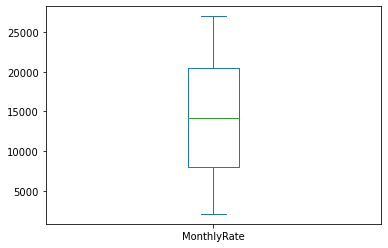

In [46]:
df['MonthlyRate'].plot.box()

<AxesSubplot:>

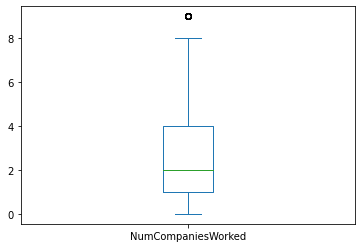

In [47]:
df['NumCompaniesWorked'].plot.box()

Observation : Outliers present

<AxesSubplot:>

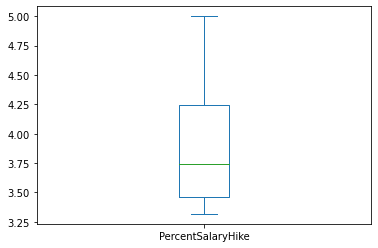

In [48]:
df['PercentSalaryHike'].plot.box()

<AxesSubplot:>

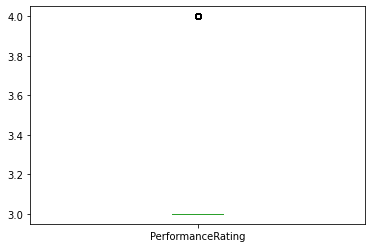

In [50]:
df['PerformanceRating'].plot.box()

Observation : Outliers present

<AxesSubplot:>

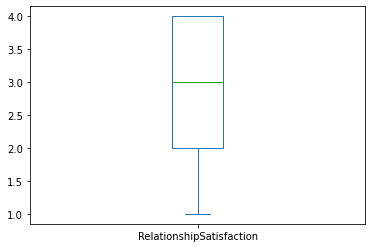

In [51]:
df['RelationshipSatisfaction'].plot.box()

<AxesSubplot:>

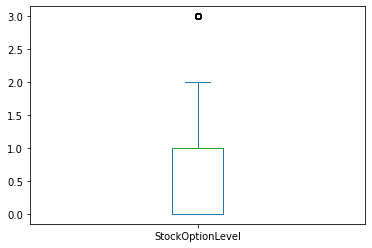

In [52]:
df['StockOptionLevel'].plot.box()

<AxesSubplot:>

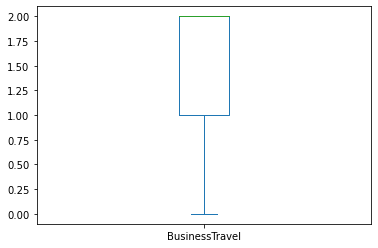

In [53]:
df['BusinessTravel'].plot.box()

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Attrition                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
BusinessTravel               AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Department                  AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
DistanceFromHome               AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Education                   AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
EducationField               AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
EmployeeNumber              AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
Gender                         AxesSubplot(0.125,0.566951;0.133621x0.0920732)
HourlyRate                  AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
JobInvolvement               AxesSubplot(0.44569,0.566951;0.1336

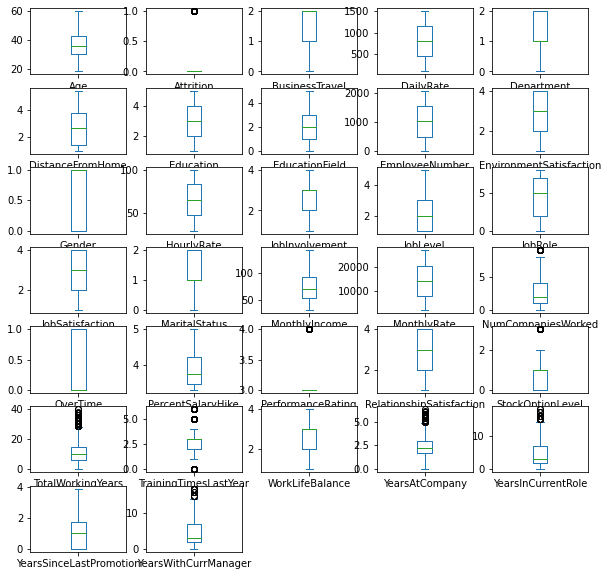

In [62]:
df.plot(kind='box',subplots=True,layout=(7,5),
        figsize=(10,10))

Observation : Some attributes shows outliers so i needs to be removed.

# Removing outliers

In [66]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))

In [67]:
z

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,1.300333,0.891688,0.937414,1.701283,0.660531,...,0.426230,1.584178,0.932014,0.421642,2.171982,2.493820,0.040574,0.063296,0.989370,0.245834
1,1.322365,0.438422,0.913194,1.297775,0.493817,0.077211,1.868426,0.937414,1.699621,0.254625,...,2.346151,1.191438,0.241988,0.164511,0.155707,0.338096,0.684253,0.764998,0.038311,0.806541
2,0.008343,2.280906,0.590048,1.414363,0.493817,0.988263,0.891688,1.316673,1.696298,1.169781,...,0.426230,0.658973,0.932014,0.550208,0.155707,0.338096,2.171423,1.167687,0.989370,1.155935
3,0.429664,0.438422,0.913194,1.461466,0.493817,0.748803,1.061787,0.937414,1.694636,1.169781,...,0.426230,0.266233,0.932014,0.421642,0.155707,0.338096,0.382771,0.764998,0.657912,1.155935
4,1.086676,0.438422,0.590048,0.524295,0.493817,0.988263,1.868426,0.565311,1.691313,1.575686,...,0.426230,1.191438,0.241988,0.678774,0.155707,0.338096,0.894326,0.615492,0.355631,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.438422,0.913194,0.202082,0.493817,1.559462,0.891688,0.565311,1.721670,0.254625,...,0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,0.152155,0.615492,0.989370,0.314873
1466,0.227347,0.438422,0.590048,0.469754,0.493817,0.208282,1.868426,0.565311,1.723332,1.169781,...,0.426230,1.584178,0.241988,0.293077,1.707500,0.338096,0.217807,0.764998,0.038311,0.806541
1467,1.086676,0.438422,0.590048,1.605183,0.493817,0.546929,0.085049,0.937414,1.726655,0.660531,...,2.346151,0.658973,0.241988,0.678774,2.171982,0.338096,0.040574,0.615492,0.989370,0.314873
1468,1.322365,0.438422,0.913194,0.546677,1.401512,0.988263,0.085049,0.565311,1.728317,1.169781,...,0.426230,1.191438,0.932014,0.735447,0.155707,1.077862,0.537709,0.488900,0.989370,1.086895


In [68]:
threshold=3
print(np.where(z>3))

(array([  28,   63,   85,   98,   98,  123,  123,  126,  126,  153,  187,
        187,  190,  190,  231,  231,  237,  270,  270,  281,  386,  401,
        445,  466,  561,  561,  595,  616,  624,  635,  686,  716,  746,
        875,  894,  914,  926,  956,  962,  976, 1024, 1043, 1078, 1111,
       1116, 1116, 1184, 1301, 1327, 1348, 1351, 1401, 1430], dtype=int64), array([31, 29, 25, 25, 28, 29, 31, 25, 28, 31, 25, 31, 28, 29, 29, 31, 28,
       25, 28, 29, 31, 25, 25, 29, 28, 31, 25, 31, 25, 31, 31, 29, 29, 31,
       25, 28, 31, 25, 28, 29, 29, 25, 31, 28, 25, 28, 25, 25, 29, 31, 29,
       25, 29], dtype=int64))


In [69]:
z.iloc[28,31]

3.6100788863016295

Observation : it shows value i greater than 3 it means outlier is there.

In [70]:
df1=df[(z<3).all(axis=1)]
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1.000000,2,1,1,2,...,3,1,0,8,0,1,2.449490,4,0.000000,5
1,49,0,1,279,1,2.828427,1,1,2,3,...,4,4,1,10,3,3,3.162278,7,1.000000,7
2,37,1,2,1373,1,1.414214,2,4,4,4,...,3,2,0,7,3,3,0.000000,0,0.000000,0
3,33,0,1,1392,1,1.732051,4,1,5,4,...,3,3,0,8,3,3,2.828427,7,1.732051,0
4,27,0,2,591,1,1.414214,1,3,7,1,...,3,4,1,6,3,3,1.414214,2,1.414214,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,4.795832,2,3,2061,3,...,3,3,1,17,3,3,2.236068,2,0.000000,3
1466,39,0,2,613,1,2.449490,1,3,2062,4,...,3,1,1,9,5,3,2.645751,7,1.000000,7
1467,27,0,2,155,1,2.000000,3,1,2064,2,...,4,2,1,6,0,3,2.449490,2,0.000000,3
1468,49,0,1,1023,2,1.414214,3,3,2065,4,...,3,4,0,17,3,2,3.000000,6,0.000000,8


In [71]:
df1.shape

(1426, 32)

# Train_Test_Split_data

In [73]:
Y = df1['Attrition']
X = df1.drop('Attrition', axis=1)
df1['Attrition']= df1['Attrition']

In [74]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# To get BEST RANDOM STATE

In [75]:
maxAccu=0  ## maximum accuracy
maxRS=0   ## best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)   ## fitting the data will train your model
    predrf=LR.predict(X_test)   ## this is the predicted target variable
    acc=accuracy_score(Y_test,predrf)  ## accuracy score
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        ## print('accuracy',maxAccu, 'random_state' i)

accuracy 0.8041958041958042 random_state 1
accuracy 0.8041958041958042 random_state 2
accuracy 0.8461538461538461 random_state 3
accuracy 0.8286713286713286 random_state 4
accuracy 0.8636363636363636 random_state 5
accuracy 0.8426573426573427 random_state 6
accuracy 0.8356643356643356 random_state 7
accuracy 0.8391608391608392 random_state 8
accuracy 0.8461538461538461 random_state 9
accuracy 0.8426573426573427 random_state 10
accuracy 0.8006993006993007 random_state 11
accuracy 0.8286713286713286 random_state 12
accuracy 0.8461538461538461 random_state 13
accuracy 0.8321678321678322 random_state 14
accuracy 0.8391608391608392 random_state 15
accuracy 0.8706293706293706 random_state 16
accuracy 0.8566433566433567 random_state 17
accuracy 0.8636363636363636 random_state 18
accuracy 0.8426573426573427 random_state 19
accuracy 0.8426573426573427 random_state 20
accuracy 0.8251748251748252 random_state 21
accuracy 0.8356643356643356 random_state 22
accuracy 0.7867132867132867 random_state 

In [76]:
print("Best accuracy is ", maxAccu," on Random_state",maxRS)

Best accuracy is  0.8776223776223776  on Random_state 172


In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=30)

# Importing some model to check accuracy score

In [94]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train) 
predlr=LR.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predlr)*100)
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
preddt=dt.predict(X_test)
print("Accuracy",accuracy_score(Y_test,preddt)*100)
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train) 
predrf=rf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predrf)*100)
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))


from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train) 
predsvc=svc.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predsvc)*100)
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train) 
predKN=svc.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predKN)*100)
print(confusion_matrix(Y_test,predKN))
print(classification_report(Y_test,predKN))

from sklearn.naive_bayes import GaussianNB
GNB=KNeighborsClassifier()
GNB.fit(X_train,Y_train) 
predGNB=svc.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predGNB)*100)
print(confusion_matrix(Y_test,predGNB))
print(classification_report(Y_test,predGNB))


Accuracy 87.41258741258741
[[249   0]
 [ 36   1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       249
           1       1.00      0.03      0.05        37

    accuracy                           0.87       286
   macro avg       0.94      0.51      0.49       286
weighted avg       0.89      0.87      0.82       286

Accuracy 79.72027972027972
[[219  30]
 [ 28   9]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       249
           1       0.23      0.24      0.24        37

    accuracy                           0.80       286
   macro avg       0.56      0.56      0.56       286
weighted avg       0.80      0.80      0.80       286

Accuracy 88.81118881118881
[[249   0]
 [ 32   5]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       249
           1       1.00      0.14      0.24        37

    accuracy                    

# Cross validation(verification with original model)

In [95]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR,X,Y,cv=5)
scr2=cross_val_score(dt,X,Y,cv=5)
scr3=cross_val_score(rf,X,Y,cv=5)
scr4=cross_val_score(svc,X,Y,cv=5)
scr5=cross_val_score(KN,X,Y,cv=5)
scr6=cross_val_score(GNB,X,Y,cv=5)


print("Cross Validation score of Logistic Regresssion model : ",scr1.mean())
print("Cross Validation score of Decision Tree Classifier : ",scr2.mean())
print("Cross Validation score of Random Forest Classifier : ",scr3.mean())
print("Cross Validation score of SVC : ",scr4.mean())
print("Cross Validation score of KNeighbors classifier : ",scr5.mean())
print("Cross Validation score of GaussianNB : ",scr6.mean())

Cross Validation score of Logistic Regresssion model :  0.8359047969574286
Cross Validation score of Decision Tree Classifier :  0.7854201938412464
Cross Validation score of Random Forest Classifier :  0.8527346337872654
Cross Validation score of SVC :  0.8359047969574286
Cross Validation score of KNeighbors classifier :  0.8127518095939148
Cross Validation score of GaussianNB :  0.8127518095939148


# Hyperparameter Tunning

In [96]:
RandomForestClassifier()

RandomForestClassifier()

In [97]:
from sklearn.model_selection import GridSearchCV

## creating parameter list to pass in GridSearchCv

parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [98]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,Y_train)  ## fitiing the data in model
GCV.best_params_   ## Printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [99]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [100]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='auto')

In [101]:
GCV_pred=GCV.best_estimator_.predict(X_test)   ## predicting with best parameters
accuracy_score(Y_test,GCV_pred) ## Checking final accuracy

0.8881118881118881

# AUC_ROC CURVE

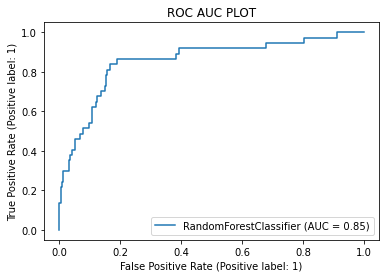

In [102]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title("ROC AUC PLOT")
plt.show()

# AdaBoostClassifier

In [105]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 87.76223776223776
[[236  13]
 [ 22  15]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       249
           1       0.54      0.41      0.46        37

    accuracy                           0.88       286
   macro avg       0.73      0.68      0.70       286
weighted avg       0.87      0.88      0.87       286



In [106]:
scr7=cross_val_score(ad,X,Y,cv=5)
print("Cross Validation score of AdaBoostClassifier : ",scr7.mean())

Cross Validation score of AdaBoostClassifier :  0.856255674150411


In [114]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 88.46153846153845
[[239  10]
 [ 23  14]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       249
           1       0.58      0.38      0.46        37

    accuracy                           0.88       286
   macro avg       0.75      0.67      0.70       286
weighted avg       0.87      0.88      0.87       286



# AdaBoost Classifier with Support Vector Classifier

In [115]:
from sklearn.svm import SVC
svc=SVC()

ad=AdaBoostClassifier(n_estimators=100,base_estimator=svc,algorithm='SAMME')
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 87.06293706293707
[[249   0]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       249
           1       0.00      0.00      0.00        37

    accuracy                           0.87       286
   macro avg       0.44      0.50      0.47       286
weighted avg       0.76      0.87      0.81       286



# Conclusion

# Saving the model in pickle format

In [117]:
## PICKeling of file or serialization of a file

import joblib
joblib.dump(GCV.best_estimator_,"HR-Employee-Attrition.pkl")

['HR-Employee-Attrition.pkl']